In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install seaborn

     |████████████████████████████████| 283 kB 7.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [4]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [5]:
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


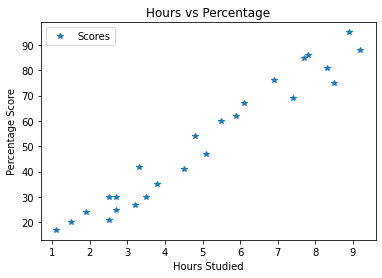

In [34]:
s_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:xlabel='Scores', ylabel='Count'>

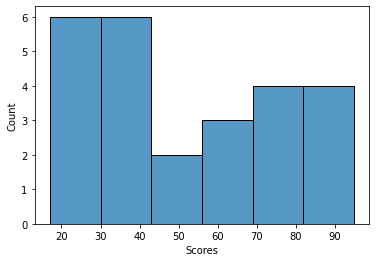

In [12]:
sns.histplot(s_data['Scores'])

In [16]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
print(X_train,X_test,y_train,y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] [20 27 69 30 62]


In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


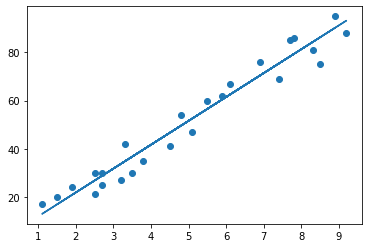

In [20]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


In [21]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


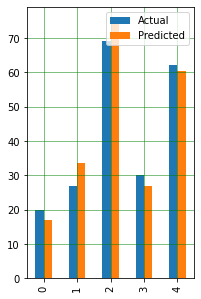

In [23]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(3,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

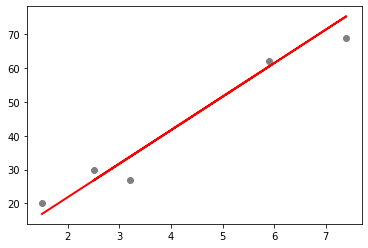

In [24]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [32]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
